In [23]:
%%capture
# turn off tensorflow INFO (Debugging info)
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import glob
import matplotlib.pyplot as plt
import keras
from keras.models import load_model
from keras import backend as K
import xml.etree.ElementTree as ET
from pprint import pprint
K.set_image_data_format('channels_first')

In [2]:
# turn off tensorflow INFO (Debugging info)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [3]:
%matplotlib inline

### Helpers

In [4]:
def remove_wspaces(img_):
    gray_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    gray_ = 255*(gray_ < 128).astype(np.uint8) # To invert the text to white
    coords_ = cv2.findNonZero(gray_) # Find all non-zero points (text)
    x_, y_, w_, h_ = cv2.boundingRect(coords_) # Find minimum spanning bounding box
    rect_ = img_[y_:y_+h_, x_:x_+w_] # Crop the image - note we do this on the original image
    
    # add a white border of 1 pixel
    bordersize=2
    rect_ = cv2.copyMakeBorder(
        rect_,
        top=bordersize,
        bottom=bordersize,
        left=bordersize,
        right=bordersize,
        borderType=cv2.BORDER_CONSTANT,
        value=[255, 255, 255]
    )
    return rect_

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)


def one_hot_encode_to_char(arr, threshold=0.5, get_max=True):
    result = []
    val = 0
    for i in range(len(arr)):
        if arr[i] >= threshold:
            result.append((val, arr[i]))
        val +=1
    _max = []
    high = 0
    if get_max:
        for i in result:
            if i[1] > high:
                _max = [i[0]]
                high = i[1]
        return _max
    else:
        return [i[0] for i in result]

def one_hot_encode_to_char_list(arr, threshold=0.5, get_max=True):
    result = []
    for i in range(len(arr)):
        if arr[i] >= threshold:
            result.append((i, arr[i]))
    _max = []
    high = 0
    result = sorted(result, key=lambda x: x[1], reverse=True)
    if get_max:
        return result[-1]
    return result

### Load Images

In [5]:
PATH_TO_TEST_IMAGES_DIR = "Datasets/Object_Detection/test/*.png"
PATH_TO_TRAIN_IMAGES_DIR = "Datasets/Object_Detection/train/*.png"

TEST_IMAGE_PATHS = list(glob.glob(PATH_TO_TEST_IMAGES_DIR))
TRAIN_IMAGE_PATHS = list(glob.glob(PATH_TO_TRAIN_IMAGES_DIR))

print("Train Image paths: ")
for i in TEST_IMAGE_PATHS:
    print(i)
    
# Change TEST/TRAIN Images to test here
image_paths = TEST_IMAGE_PATHS

Train Image paths: 
Datasets/Object_Detection/test\exp0015.png
Datasets/Object_Detection/test\exp0016.png
Datasets/Object_Detection/test\exp0029.png
Datasets/Object_Detection/test\exp0037.png
Datasets/Object_Detection/test\exp0044.png
Datasets/Object_Detection/test\exp0051.png
Datasets/Object_Detection/test\exp9.png


### Load CNN/ANN Model

In [6]:
IMAGE_SIZE = (320, 320)
models_path = "trained_models/"

# CNN
#cnn = load_model(models_path+"hasyv2model31.h5")
#cnn = load_model(models_path+"hasyv2model51.h5")
cnn = load_model(models_path+"model3.h5")

# ANN
#ann = load_model(models_path+"ann1.h5")

### Load symbols/labels

In [7]:
symbols = pd.read_csv("processed_data/symbols.csv").drop(["Unnamed: 0"], axis=1)
symbols.head()

,latex,old_symbol,new_id
0,A,31,0
1,B,32,1
2,C,33,2
3,D,34,3
4,E,35,4


### Feature Detection

Image path:  Datasets/Object_Detection/test\exp0015.png


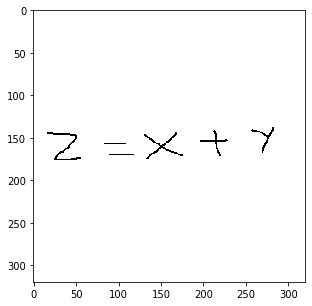

CNN/ANN Predictions:
Symbol_id: 61 , Latex: z , Confidence Score: 99.62 %


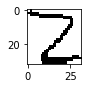

CNN/ANN Predictions:
Symbol_id: 81 , Latex: \supset , Confidence Score: 47.64 %
Symbol_id: 104 , Latex: = , Confidence Score: 23.3 %
Symbol_id: 83 , Latex: - , Confidence Score: 9.81 %
Symbol_id: 96 , Latex: \perp , Confidence Score: 2.74 %
Symbol_id: 65 , Latex: \Delta , Confidence Score: 2.57 %
Symbol_id: 31 , Latex: 5 , Confidence Score: 2.5 %
Symbol_id: 51 , Latex: o , Confidence Score: 2.36 %
Symbol_id: 75 , Latex: \cdot , Confidence Score: 1.34 %
Symbol_id: 98 , Latex: \exists , Confidence Score: 1.22 %
Symbol_id: 105 , Latex: //( , Confidence Score: 1.08 %


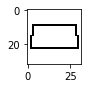

CNN/ANN Predictions:
Symbol_id: 81 , Latex: \supset , Confidence Score: 42.18 %
Symbol_id: 104 , Latex: = , Confidence Score: 29.61 %
Symbol_id: 83 , Latex: - , Confidence Score: 10.21 %
Symbol_id: 96 , Latex: \perp , Confidence Score: 4.24 %
Symbol_id: 65 , Latex: \Delta , Confidence Score: 2.61 %
Symbol_id: 31 , Latex: 5 , Confidence Score: 1.64 %
Symbol_id: 51 , Latex: o , Confidence Score: 1.6 %
Symbol_id: 105 , Latex: //( , Confidence Score: 1.28 %
Symbol_id: 75 , Latex: \cdot , Confidence Score: 1.21 %


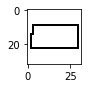

CNN/ANN Predictions:
Symbol_id: 92 , Latex: \times , Confidence Score: 99.42 %


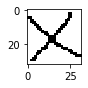

CNN/ANN Predictions:
Symbol_id: 84 , Latex: + , Confidence Score: 98.91 %


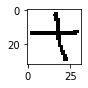

CNN/ANN Predictions:
Symbol_id: 63 , Latex: \gamma , Confidence Score: 95.91 %
Symbol_id: 24 , Latex: Y , Confidence Score: 2.83 %
Symbol_id: 60 , Latex: y , Confidence Score: 1.16 %


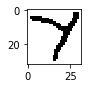

number of char in image: 6
Image path:  Datasets/Object_Detection/test\exp0016.png


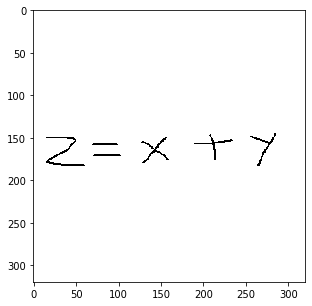

CNN/ANN Predictions:
Symbol_id: 25 , Latex: Z , Confidence Score: 88.24 %
Symbol_id: 28 , Latex: 2 , Confidence Score: 7.87 %
Symbol_id: 61 , Latex: z , Confidence Score: 3.87 %


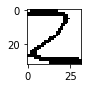

CNN/ANN Predictions:
Symbol_id: 81 , Latex: \supset , Confidence Score: 44.76 %
Symbol_id: 104 , Latex: = , Confidence Score: 22.91 %
Symbol_id: 83 , Latex: - , Confidence Score: 10.4 %
Symbol_id: 65 , Latex: \Delta , Confidence Score: 3.57 %
Symbol_id: 51 , Latex: o , Confidence Score: 3.41 %
Symbol_id: 31 , Latex: 5 , Confidence Score: 2.85 %
Symbol_id: 96 , Latex: \perp , Confidence Score: 2.23 %
Symbol_id: 75 , Latex: \cdot , Confidence Score: 1.7 %
Symbol_id: 105 , Latex: //( , Confidence Score: 1.45 %


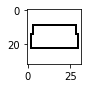

CNN/ANN Predictions:
Symbol_id: 81 , Latex: \supset , Confidence Score: 61.21 %
Symbol_id: 104 , Latex: = , Confidence Score: 20.3 %
Symbol_id: 83 , Latex: - , Confidence Score: 3.4 %
Symbol_id: 65 , Latex: \Delta , Confidence Score: 2.51 %
Symbol_id: 51 , Latex: o , Confidence Score: 2.18 %
Symbol_id: 75 , Latex: \cdot , Confidence Score: 2.16 %
Symbol_id: 31 , Latex: 5 , Confidence Score: 1.47 %
Symbol_id: 95 , Latex: \cap , Confidence Score: 1.27 %
Symbol_id: 105 , Latex: //( , Confidence Score: 1.23 %


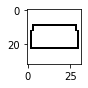

CNN/ANN Predictions:
Symbol_id: 92 , Latex: \times , Confidence Score: 99.99 %


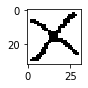

CNN/ANN Predictions:
Symbol_id: 84 , Latex: + , Confidence Score: 83.46 %
Symbol_id: 96 , Latex: \perp , Confidence Score: 11.68 %


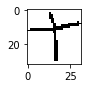

CNN/ANN Predictions:
Symbol_id: 60 , Latex: y , Confidence Score: 53.52 %
Symbol_id: 63 , Latex: \gamma , Confidence Score: 26.85 %
Symbol_id: 24 , Latex: Y , Confidence Score: 14.39 %
Symbol_id: 59 , Latex: x , Confidence Score: 2.03 %
Symbol_id: 33 , Latex: 7 , Confidence Score: 1.07 %


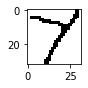

number of char in image: 6
Image path:  Datasets/Object_Detection/test\exp0029.png


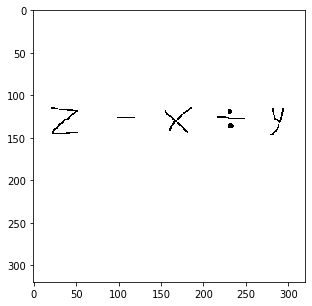

CNN/ANN Predictions:
Symbol_id: 61 , Latex: z , Confidence Score: 93.76 %
Symbol_id: 25 , Latex: Z , Confidence Score: 5.91 %


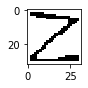

CNN/ANN Predictions:
Symbol_id: 104 , Latex: = , Confidence Score: 37.76 %
Symbol_id: 96 , Latex: \perp , Confidence Score: 17.76 %
Symbol_id: 76 , Latex: \leq , Confidence Score: 16.29 %
Symbol_id: 77 , Latex: \geq , Confidence Score: 13.37 %
Symbol_id: 81 , Latex: \supset , Confidence Score: 6.55 %
Symbol_id: 82 , Latex: \subseteq , Confidence Score: 5.1 %
Symbol_id: 61 , Latex: z , Confidence Score: 1.2 %
Symbol_id: 94 , Latex: \div , Confidence Score: 1.04 %


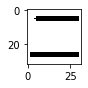

CNN/ANN Predictions:
Symbol_id: 92 , Latex: \times , Confidence Score: 99.6 %


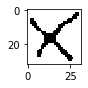

CNN/ANN Predictions:
Symbol_id: 94 , Latex: \div , Confidence Score: 99.94 %


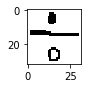

CNN/ANN Predictions:
Symbol_id: 97 , Latex: \forall , Confidence Score: 64.37 %
Symbol_id: 60 , Latex: y , Confidence Score: 32.37 %
Symbol_id: 98 , Latex: \exists , Confidence Score: 1.93 %


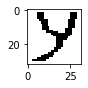

number of char in image: 5
Image path:  Datasets/Object_Detection/test\exp0037.png


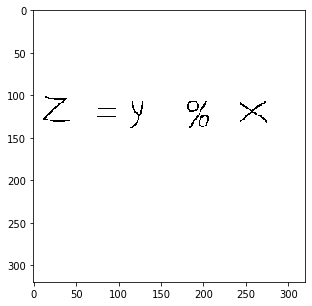

CNN/ANN Predictions:
Symbol_id: 61 , Latex: z , Confidence Score: 95.74 %
Symbol_id: 25 , Latex: Z , Confidence Score: 4.04 %


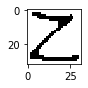

CNN/ANN Predictions:
Symbol_id: 104 , Latex: = , Confidence Score: 37.76 %
Symbol_id: 96 , Latex: \perp , Confidence Score: 17.76 %
Symbol_id: 76 , Latex: \leq , Confidence Score: 16.29 %
Symbol_id: 77 , Latex: \geq , Confidence Score: 13.37 %
Symbol_id: 81 , Latex: \supset , Confidence Score: 6.55 %
Symbol_id: 82 , Latex: \subseteq , Confidence Score: 5.1 %
Symbol_id: 61 , Latex: z , Confidence Score: 1.2 %
Symbol_id: 94 , Latex: \div , Confidence Score: 1.04 %


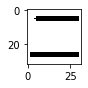

CNN/ANN Predictions:
Symbol_id: 97 , Latex: \forall , Confidence Score: 64.37 %
Symbol_id: 60 , Latex: y , Confidence Score: 32.37 %
Symbol_id: 98 , Latex: \exists , Confidence Score: 1.93 %


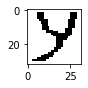

CNN/ANN Predictions:
Symbol_id: 90 , Latex: \% , Confidence Score: 99.98 %


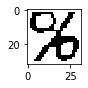

CNN/ANN Predictions:
Symbol_id: 92 , Latex: \times , Confidence Score: 99.95 %


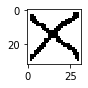

number of char in image: 5
Image path:  Datasets/Object_Detection/test\exp0044.png


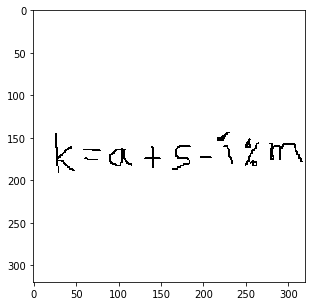

CNN/ANN Predictions:
Symbol_id: 47 , Latex: k , Confidence Score: 98.55 %
Symbol_id: 10 , Latex: K , Confidence Score: 1.4 %


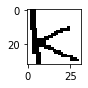

CNN/ANN Predictions:
Symbol_id: 62 , Latex: \Sigma , Confidence Score: 52.19 %
Symbol_id: 90 , Latex: \% , Confidence Score: 43.08 %
Symbol_id: 94 , Latex: \div , Confidence Score: 3.41 %


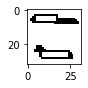

CNN/ANN Predictions:
Symbol_id: 37 , Latex: a , Confidence Score: 38.84 %
Symbol_id: 6 , Latex: G , Confidence Score: 28.27 %
Symbol_id: 16 , Latex: Q , Confidence Score: 13.26 %
Symbol_id: 88 , Latex: \& , Confidence Score: 12.66 %
Symbol_id: 85 , Latex: \$ , Confidence Score: 6.05 %


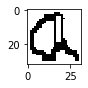

CNN/ANN Predictions:
Symbol_id: 84 , Latex: + , Confidence Score: 99.58 %


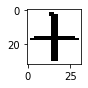

CNN/ANN Predictions:
Symbol_id: 85 , Latex: \$ , Confidence Score: 99.99 %


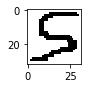

CNN/ANN Predictions:
Symbol_id: 81 , Latex: \supset , Confidence Score: 53.35 %
Symbol_id: 104 , Latex: = , Confidence Score: 26.88 %
Symbol_id: 31 , Latex: 5 , Confidence Score: 7.75 %
Symbol_id: 51 , Latex: o , Confidence Score: 2.8 %
Symbol_id: 65 , Latex: \Delta , Confidence Score: 2.18 %


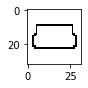

CNN/ANN Predictions:
Symbol_id: 85 , Latex: \$ , Confidence Score: 43.98 %
Symbol_id: 63 , Latex: \gamma , Confidence Score: 14.16 %
Symbol_id: 90 , Latex: \% , Confidence Score: 10.77 %
Symbol_id: 6 , Latex: G , Confidence Score: 10.5 %
Symbol_id: 29 , Latex: 3 , Confidence Score: 9.98 %
Symbol_id: 76 , Latex: \leq , Confidence Score: 2.5 %
Symbol_id: 45 , Latex: i , Confidence Score: 1.88 %
Symbol_id: 94 , Latex: \div , Confidence Score: 1.14 %
Symbol_id: 55 , Latex: s , Confidence Score: 1.12 %


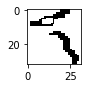

CNN/ANN Predictions:
Symbol_id: 90 , Latex: \% , Confidence Score: 87.67 %
Symbol_id: 89 , Latex: \# , Confidence Score: 12.26 %


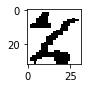

CNN/ANN Predictions:
Symbol_id: 49 , Latex: m , Confidence Score: 72.47 %
Symbol_id: 50 , Latex: n , Confidence Score: 26.25 %
Symbol_id: 12 , Latex: M , Confidence Score: 1.02 %


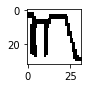

number of char in image: 9
Image path:  Datasets/Object_Detection/test\exp0051.png


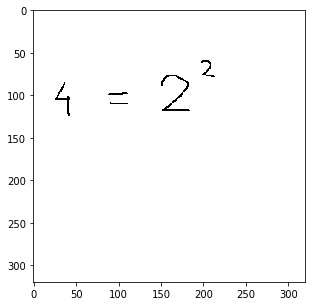

CNN/ANN Predictions:
Symbol_id: 30 , Latex: 4 , Confidence Score: 72.19 %
Symbol_id: 0 , Latex: A , Confidence Score: 13.38 %
Symbol_id: 89 , Latex: \# , Confidence Score: 11.92 %
Symbol_id: 90 , Latex: \% , Confidence Score: 1.5 %


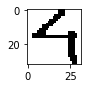

CNN/ANN Predictions:
Symbol_id: 62 , Latex: \Sigma , Confidence Score: 44.21 %
Symbol_id: 76 , Latex: \leq , Confidence Score: 21.53 %
Symbol_id: 94 , Latex: \div , Confidence Score: 14.0 %
Symbol_id: 61 , Latex: z , Confidence Score: 7.56 %
Symbol_id: 104 , Latex: = , Confidence Score: 5.0 %
Symbol_id: 25 , Latex: Z , Confidence Score: 3.18 %
Symbol_id: 90 , Latex: \% , Confidence Score: 1.41 %
Symbol_id: 98 , Latex: \exists , Confidence Score: 1.01 %


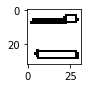

CNN/ANN Predictions:
Symbol_id: 28 , Latex: 2 , Confidence Score: 99.93 %


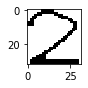

CNN/ANN Predictions:
Symbol_id: 25 , Latex: Z , Confidence Score: 96.7 %
Symbol_id: 90 , Latex: \% , Confidence Score: 1.16 %


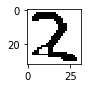

number of char in image: 4
Image path:  Datasets/Object_Detection/test\exp9.png


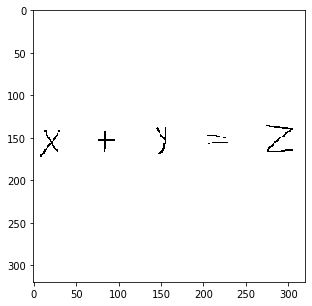

CNN/ANN Predictions:
Symbol_id: 92 , Latex: \times , Confidence Score: 96.34 %
Symbol_id: 93 , Latex: \ast , Confidence Score: 2.54 %
Symbol_id: 59 , Latex: x , Confidence Score: 1.11 %


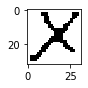

CNN/ANN Predictions:
Symbol_id: 84 , Latex: + , Confidence Score: 99.94 %


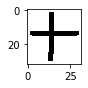

CNN/ANN Predictions:
Symbol_id: 77 , Latex: \geq , Confidence Score: 64.55 %
Symbol_id: 62 , Latex: \Sigma , Confidence Score: 32.26 %
Symbol_id: 85 , Latex: \$ , Confidence Score: 2.32 %


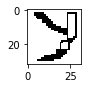

CNN/ANN Predictions:
Symbol_id: 77 , Latex: \geq , Confidence Score: 88.44 %
Symbol_id: 104 , Latex: = , Confidence Score: 8.22 %
Symbol_id: 62 , Latex: \Sigma , Confidence Score: 3.24 %


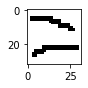

CNN/ANN Predictions:
Symbol_id: 61 , Latex: z , Confidence Score: 93.76 %
Symbol_id: 25 , Latex: Z , Confidence Score: 5.91 %


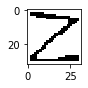

number of char in image: 5


In [11]:
for i in image_paths:
    image = cv2.imread(i)
    print('Image path: ', i)
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.show()
    
    # Image Preprocessing
    # Remove Noise
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
    
    # Change color channel to Grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    # Convert not so faint pixels to black and others to white 
    res,thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV) #threshold 
    
    # Structuring Element
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) 
    
    # Lower the thickness of features
    dilated = cv2.dilate(thresh,kernel,iterations = 5) 
    
    # Find countours/features and draw bounding box around them
    val,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
    coord = []
    for contour in contours:  
        [x,y,w,h] = cv2.boundingRect(contour)   
        if h>300 and w>300:   
            continue   
        if h<7 or w<7:   
            continue  
        coord.append((x,y,w,h)) 
    
    # if the image has only one sentence sort in one axis
    coord.sort(key=lambda tup:tup[0]) 
    
    # crop the bounding boxes and detect labels for them
    count = 0
    for cor in coord:
        [x,y,w,h] = cor
        
        # crop image
        t = image[y:y+h,x:x+w,:]
        
        # remove extra whitespace layer around feature
        t = remove_wspaces(t)
        
        # resize image to 32 x 32
        t = cv2.resize(t, (32,32))
        
        # convert to a binary array (contains either 0 or 1)
        _, t = cv2.threshold(t,200,255,cv2.THRESH_BINARY)
        
        # edge detection to remove noise
        t = cv2.Laplacian(t,cv2.CV_64F, ksize=3)
        
        # fill any gaps inside feature lost during edge detection
        kernel = np.ones((3,3),np.uint8)
        t = cv2.morphologyEx(t, cv2.MORPH_CLOSE, kernel)
        #
        
        # Erosion area (output is too thin (around 1 px)) 
        # Both CNN/ANN were not able to detect features because of this method
        # kernel = np.ones((2,2),np.uint8)
        #t = cv2.erode(t,kernel,iterations = 1)
        #
        
        # invert inverted image to white background and black features
        t = 255 - t
        
        # this line is used to reset all values to 0 or 255
        _, t = cv2.threshold(t,50,255,cv2.THRESH_BINARY)
                
        # Convert image to numpy array (uint8 since fatures are 255/0)
        # If image contains values as 0 to 255, they should be in integers 
        # (uint8 takes values between 0 and 255)
        # If image contains values as 0 or 1, they should be in float
        t_im = np.asarray(t).astype('uint8')
        
        # Change Color channels to grayscale
        #t_im = cv2.cvtColor(t_im, cv2.COLOR_BGRA2RGBA)
        #t_im = cv2.cvtColor(t_im, cv2.COLOR_RGBA2RGB)
        #t_im = cv2.cvtColor(t_im, cv2.COLOR_BGR2RGB)
        t_im = cv2.cvtColor(t_im, cv2.COLOR_RGB2GRAY)
        
        # resize image to 32 x 32 (not required but just to ensure image is 32 x 32)
        t_im = cv2.resize(t_im, (32,32))
        
        # change features to 0/1
        t_im = t_im / 255.0
        
        # Label Prediction
        # CNN
        t_im = np.resize(t_im, (1, 1, 32, 32))
        t_im = t_im.astype('float32')
        res = cnn.predict(t_im)
        #
        # ANN
        #t_im = t_im.flatten().reshape((1, 32*32))
        #print(t_im.shape)
        #res = ann.predict(t_im)
        #
        
        # flatten result and convert one hot encoded result to a label (0 to 106)
        res = res.flatten()
        # lbl = one_hot_encode_to_char(res, threshold=0.1)
        # if type(lbl) == list: lbl = lbl[0]
        # print("Symbol is :", symbols.loc[symbols['new_id']==lbl])
        lbls = one_hot_encode_to_char_list(res, threshold=0.01, get_max = False)
        
        # Print Predictions
        print("CNN/ANN Predictions:")
        for j in lbls:
            symbols_row = symbols[symbols['new_id'] == j[0]][['latex', 'old_symbol', 'new_id']]
            latex, old_symbol, new_id = symbols_row.iloc[0].to_list()
            print('Symbol_id:', new_id, ', Latex:', latex, ', Confidence Score:', round(j[1]*100, 2), '%')

        # Display figure
        plt.figure(figsize=(1,1))
        # plt.subplot(len(coord),1, count+1)
        plt.imshow(t.astype('uint8'))
        plt.show()
        count += 1
    print("number of char in image:", count)

### Example showing the output of each image processing

Image path:  Datasets/Object_Detection/test\exp0015.png
Original Image


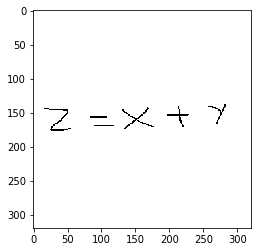

after denoising


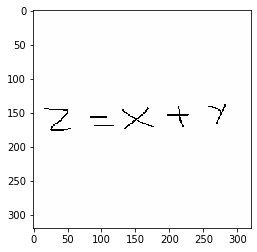

after changing color channel


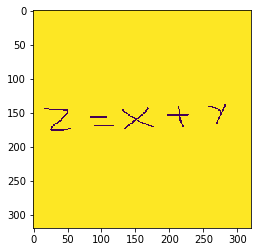

after changing color


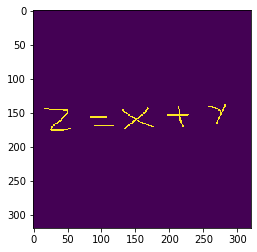

Structuring element
array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)
after dilation


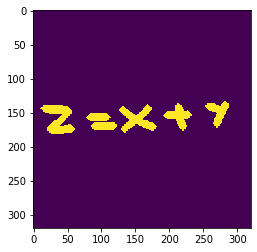

After contour search
contours:  6
hierarchy:  [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [-1  4 -1 -1]]]
predicted bboxes [(84, 164, 40, 12), (78, 151, 36, 12), (126, 138, 56, 42), (11, 138, 51, 44), (191, 136, 43, 41), (252, 133, 36, 40)]
orted bboxes [(11, 138, 51, 44), (78, 151, 36, 12), (84, 164, 40, 12), (126, 138, 56, 42), (191, 136, 43, 41), (252, 133, 36, 40)]
cropped images


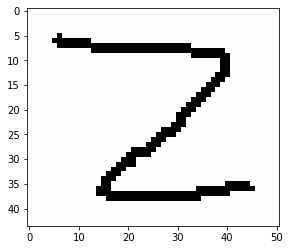

after removing whitespaces


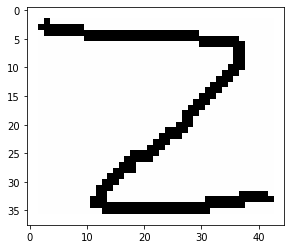

after resizing to 32 x 32


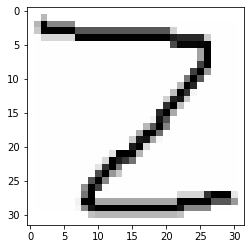

after getting theshold 


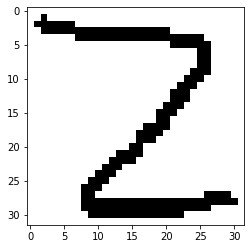

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after edge detection


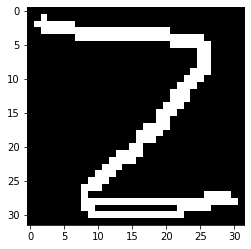

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after filling gaps


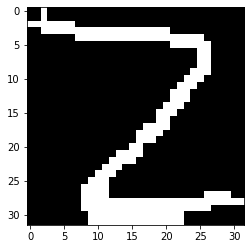

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


after inverting and getting threshold


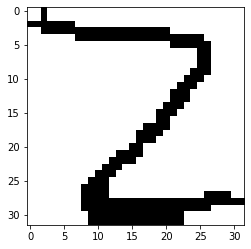

before character classification


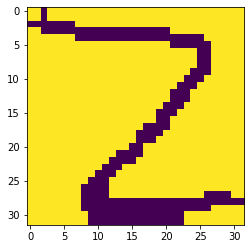

array([[1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
CNN/ANN Predictions:
Symbol_id: 61 , Latex: z , Confidence Score: 99.62 %


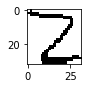

number of char in image: 1


In [22]:
for i in image_paths:
    image = cv2.imread(i)
    print('Image path: ', i)
    print("Original Image")
    plt.figure()
    plt.imshow(image)
    plt.show()
    
    # Image Preprocessing
    # Remove Noise
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
    print('after denoising')
    plt.imshow(image)
    plt.show()
    
    # Change color channel to Grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    print('after changing color channel')
    plt.imshow(gray)
    plt.show()
    
    # Convert not so faint pixels to black and others to white 
    res,thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV) #threshold 
    print('after changing color')
    plt.imshow(thresh)
    plt.show()
    
    # Structuring Element
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) 
    print('Structuring element')
    pprint(kernel)
    
    # Lower the thickness of features
    dilated = cv2.dilate(thresh,kernel,iterations = 5) 
    print('after dilation')
    plt.imshow(dilated)
    plt.show()
    
    # Find countours/features and draw bounding box around them
    val,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
    coord = []
    for contour in contours:  
        [x,y,w,h] = cv2.boundingRect(contour)   
        if h>300 and w>300:   
            continue   
        if h<7 or w<7:   
            continue  
        coord.append((x,y,w,h))
    
    print('After contour search')
    # print('val: ', val.shape)
    print('contours: ', len(contours))
    print('hierarchy: ', hierarchy)
    print('predicted bboxes', coord)
    
    # if the image has only one sentence sort in one axis
    coord.sort(key=lambda tup:tup[0]) 
    
    print('orted bboxes', coord)
    
    # crop the bounding boxes and detect labels for them
    count = 0
    for cor in coord:
        [x,y,w,h] = cor
        
        # crop image
        t = image[y:y+h,x:x+w,:]
        print('cropped images')
        plt.imshow(t)
        plt.show()
    
        # remove extra whitespace layer around feature
        t = remove_wspaces(t)
        print('after removing whitespaces')
        plt.imshow(t)
        plt.show()
    
        # resize image to 32 x 32
        t = cv2.resize(t, (32,32))
        print('after resizing to 32 x 32')
        plt.imshow(t)
        plt.show()
    
        # convert to a binary array (contains either 0 or 1)
        _, t = cv2.threshold(t,200,255,cv2.THRESH_BINARY)
        print('after getting theshold ')
        plt.imshow(t)
        plt.show()
    
        # edge detection to remove noise
        t = cv2.Laplacian(t,cv2.CV_64F, ksize=3)
        print('after edge detection')
        plt.imshow(t)
        plt.show()
    
        
        # fill any gaps inside feature lost during edge detection
        kernel = np.ones((3,3),np.uint8)
        t = cv2.morphologyEx(t, cv2.MORPH_CLOSE, kernel)
        #
        print('after filling gaps')
        plt.imshow(t)
        plt.show()
    
        
        # Erosion area (output is too thin (around 1 px)) 
        # Both CNN/ANN were not able to detect features because of this method
        # kernel = np.ones((2,2),np.uint8)
        #t = cv2.erode(t,kernel,iterations = 1)
        #
        
        # invert inverted image to white background and black features
        t = 255 - t
        
        # this line is used to reset all values to 0 or 255
        _, t = cv2.threshold(t,50,255,cv2.THRESH_BINARY)
        print('after inverting and getting threshold')
        plt.imshow(t)
        plt.show()
    
        # Convert image to numpy array (uint8 since fatures are 255/0)
        # If image contains values as 0 to 255, they should be in integers 
        # (uint8 takes values between 0 and 255)
        # If image contains values as 0 or 1, they should be in float
        t_im = np.asarray(t).astype('uint8')
        
        # Change Color channels to grayscale
        #t_im = cv2.cvtColor(t_im, cv2.COLOR_BGRA2RGBA)
        #t_im = cv2.cvtColor(t_im, cv2.COLOR_RGBA2RGB)
        #t_im = cv2.cvtColor(t_im, cv2.COLOR_BGR2RGB)
        t_im = cv2.cvtColor(t_im, cv2.COLOR_RGB2GRAY)
        
        # resize image to 32 x 32 (not required but just to ensure image is 32 x 32)
        t_im = cv2.resize(t_im, (32,32))
        
        # change features to 0/1
        t_im = t_im / 255.0
        print('before character classification')
        plt.imshow(t_im)
        plt.show()
        pprint(t_im)
    
        # Label Prediction
        # CNN
        t_im = np.resize(t_im, (1, 1, 32, 32))
        t_im = t_im.astype('float32')
        res = cnn.predict(t_im)
        #
        # ANN
        #t_im = t_im.flatten().reshape((1, 32*32))
        #print(t_im.shape)
        #res = ann.predict(t_im)
        #
        
        # flatten result and convert one hot encoded result to a label (0 to 106)
        res = res.flatten()
        # lbl = one_hot_encode_to_char(res, threshold=0.1)
        # if type(lbl) == list: lbl = lbl[0]
        # print("Symbol is :", symbols.loc[symbols['new_id']==lbl])
        lbls = one_hot_encode_to_char_list(res, threshold=0.01, get_max = False)
        
        # Print Predictions
        print("CNN/ANN Predictions:")
        for j in lbls:
            symbols_row = symbols[symbols['new_id'] == j[0]][['latex', 'old_symbol', 'new_id']]
            latex, old_symbol, new_id = symbols_row.iloc[0].to_list()
            print('Symbol_id:', new_id, ', Latex:', latex, ', Confidence Score:', round(j[1]*100, 2), '%')

        # Display figure
        plt.figure(figsize=(1,1))
        # plt.subplot(len(coord),1, count+1)
        plt.imshow(t.astype('uint8'))
        plt.show()
        count += 1
        break
    print("number of char in image:", count)
    break